# GOAT Analysis

This project is to see who the data says the greatest NBA player of all time is, the NBA's GOAT for short. To develop a GOAT score a weighted average of different features was used.

The first step of creating a score was to determine which features to include in the weighted average. A little over a year ago, a Reddit user, natekchua, posted a poll  to see who people thought the GOAT was and what measurements voters thought were important when evaluating who the GOAT is (https://docs.google.com/forms/d/1iEbVeolgRd8VuFOx7WygLEPWk4XNVexktswDJyt0n5U/viewanalytics). Nine of the top ten most voted measurements in the survey were used (Could not find career win rate by player data).

Measurements and Weights
1. Career Stats (25.25%, split between minutes per game, points per game, rebounds per game, assists per game, steals per game, and blocks per game)
2. Championships* (24.37%)
3. Regular Season MVPs (Most Valuable Player Award) (17.44%)
4. Win Shares per 48 minutes (12.05%)
5. Advanced Stats (11% split between PER, BPM, and VORP)
6. Finals MVPs (5.67%)
7. Points (Total vs average)
8. All Star Selections (1.87%)
9. All NBA Selections (0.33%)

*For championships used various interaction effects so the best players on championship teams were given more credit for championships than role players. Interactions were with finals mvps, usage rate, and minutes per game.

The Data for all these features was taken from https://www.basketball-reference.com/. One hurdle for this project, however, was that not all data goes back to the inception of the NBA. In particular the finals MVP award was not introduced until 1969 and VORP and BPM are not available until the 1973-1974 season. To work around this, two lists were created in which 1979 (the year the 3 point line was established and the NBA and ABA merged) served as the bifurcation point. To determine which list each player was placed in, their career midpoint was used. Players whose career midpoint was before 1979 being put in the Old School (OS) list and players whose career midpoint was after 1979 put in the modern list. The missing measurements for the OS list were evenly split among those available.

Once the data was ingested, processed, and split between the two eras(pre and post 1979) all the features were normalized between 0 and 1. After normalizing the data, a weighted average was taken, using the percentage of total votes from the survey, to compute the final GOAT score of each player. Then to compare my ratings to a qualitative list I combined the modern list and the old school list.

After creating my initial list, I realized that the large weight assigned to championships was causing secondary and tertiary players to be too high in the rankings. So in addition to having championships and MVPs as independent factors I added an interaction effect so that if the player is the best player on the best team he gets more of the credit.

Once the rankings were finalized I compared my list to Bill Simmons’ top 15 players he lists in his Book of Basketball 2.0 podcast. I discuss my findings and the comparison here: insert link. 


In [49]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings

In [50]:
#number of championships by each player, manually added number for players in the top 250 with 1 or 2 championships
df_champ = pd.read_excel('df.xlsx', sheet_name = 'championships')
#Remove asterik from player name
df_champ[['Player', 'PID']] = df_champ['Player'].str.split("*", expand=True)
#subset data
df_champ = df_champ[['Player', 'No. of Championships']]

In [51]:
#dataset for each regular season mvp season
df_mvp = pd.read_excel('df.xlsx', sheet_name = 'mvps')
#Get MVP count
df_mvp = df_mvp['Player'].value_counts().reset_index().rename(columns={'index': 'Player', 'Player': 'mvp_count'})
#subset data
df_mvp = df_mvp[['Player', 'mvp_count']]

In [52]:
#Top 250 players by Player Efficiency Rating (PER)
df_per = pd.read_excel('df.xlsx', sheet_name = 'per')
#Remove asterik from player name
df_per[['Player', 'PID']] = df_per['Player'].str.split("*", expand=True)
df_per = df_per[['Player', 'PER']]

In [53]:
#Top 250 players by Value over Replacment Player (VORP)
df_vorp = pd.read_excel('df.xlsx', sheet_name = 'vorp')
#Remove asterik from player name
df_vorp[['Player', 'PID']] = df_vorp['Player'].str.split("*", expand=True)
#subset data
df_vorp = df_vorp[['Player', 'VORP']]

In [54]:
#Top 250 players by Box Plus Minus (BPM) 
df_bpm = pd.read_excel('df.xlsx', sheet_name = 'bpm')
#Remove Asterik from player name
df_bpm[['Player', 'PID']] = df_bpm['Player'].str.split("*", expand=True)
df_bpm = df_bpm[['Player', 'BPM']]

In [55]:
#Top 250 players by WS/48
df_ws = pd.read_excel('df.xlsx', sheet_name = 'ws')
#Remove asterik from player name
df_ws[['Player', 'PID']] = df_ws['Player'].str.split("*", expand=True)
#subset data
df_ws = df_ws[['Player', 'WS/48']]

In [56]:
#Number of all-star appearences by player
df_star = pd.read_excel('df.xlsx', sheet_name = 'all_star')
#subset data
df_star = df_star[['Player', 'No. of All Star Selections']]

In [57]:
#Leaders in Points Per Game
df_ppg = pd.read_excel('df.xlsx', sheet_name = 'ppg')
#Remove asterik form player names
df_ppg[['Player', 'PID']] = df_ppg['Player'].str.split("*", expand=True)
#subset data
df_ppg = df_ppg[['Player', 'PPG']]

In [58]:
#Leaders in Games Played
df_gp = pd.read_excel('df.xlsx', sheet_name = 'gp')
#Remove asterik from player names
df_gp[['Player', 'PID']] = df_gp['Player'].str.split("*", expand=True)
#subset data
df_gp = df_gp[['Player', 'G']]

In [59]:
#Leaders in MPG
df_mpg = pd.read_excel('df.xlsx', sheet_name = 'mpg')
#Remove asterik from player names
df_mpg[['Player', 'PID']] = df_mpg['Player'].str.split("*", expand=True)
#subset data
df_mpg = df_mpg[['Player', 'MPG']]

In [60]:
#Leaders in RPG
df_rpg = pd.read_excel('df.xlsx', sheet_name = 'rpg')
#Remove asterik from player names
df_rpg[['Player', 'PID']] = df_rpg['Player'].str.split("*", expand=True)
#subset data
df_rpg = df_rpg[['Player', 'RPG']]

In [61]:
#Leaders in APG
df_apg = pd.read_excel('df.xlsx', sheet_name = 'apg')
#remove asterik from player names
df_apg[['Player', 'PID']] = df_apg['Player'].str.split("*", expand=True)
#subset data
df_apg = df_apg[['Player', 'APG']]

In [62]:
#No. of Finals mvps by player
df_fmvp = pd.read_excel('df.xlsx', sheet_name = 'finals_mvps')
#Count final mvps by player
df_fmvp = df_fmvp['Player'].value_counts().reset_index().rename(columns={'index': 'Player', 'Player': 'fmvp_count'})
#subset data
df_fmvp = df_fmvp[['Player', 'fmvp_count']]

In [63]:
#No. of All NBA appearences
df_anba = pd.read_excel('df.xlsx', sheet_name = 'all_nba')
#subset data
df_anba = df_anba[['Player', 'All_NBA']]

In [64]:
#Leaders in SPG
df_spg = pd.read_excel('df.xlsx', sheet_name = 'stl')
#remove asterik from player names
df_spg[['Player', 'PID']] = df_spg['Player'].str.split("*", expand=True)
#subset data
df_spg = df_spg[['Player', 'SPG']]

In [65]:
#Leaders in BPG
df_bpg = pd.read_excel('df.xlsx', sheet_name = 'blk')
#remove asterik from player names
df_bpg[['Player', 'PID']] = df_bpg['Player'].str.split("*", expand=True)
#subset data
df_bpg = df_bpg[['Player', 'BPG']]

In [66]:
#top 250 by usage
df_usg = pd.read_excel('df.xlsx', sheet_name = 'usg')
#remove asterik from player names
df_usg[['Player', 'PID']] = df_usg['Player'].str.split('*', expand=True)
df_usg = df_usg[['Player', 'Usg%']]

In [67]:
#Leaders in total points
df_points= pd.read_excel('df.xlsx', sheet_name = 'points')
#remove asterik from player names
df_points[['Player', 'PID']] = df_points['Player'].str.split("*", expand=True)
df_points = df_points[['Player', 'PTS']]

In [68]:
#Combine the data
df_goat = pd.merge(df_champ, df_mvp, how = 'outer', on = 'Player')
df_goat = pd.merge(df_goat, df_ws, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_ppg, how='outer', on = 'Player')
df_goat = pd.merge(df_goat,df_fmvp, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_mpg, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_rpg, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_apg, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_per, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_bpm, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_vorp, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_star, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_anba, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_spg, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_bpg, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_usg, how='outer', on = 'Player')
df_goat = pd.merge(df_goat, df_points, how='outer', on = 'Player')
df_goat = df_goat.fillna(0)

#Get finals mvp%
df_goat['fmvp_pct'] = df_goat['fmvp_count']/df_goat['No. of Championships']
#load slam's top 500 to get years
df_year = pd.read_excel('df.xlsx', sheet_name = 'years')
df_year['midpoint'] = (df_year['From'] + df_year['To'])/2
df_year = df_year[['Player', 'midpoint']]
'''
Because slams list ends at 500 it is safely assumed that the years for all notable players who's career midpoint was prior 
to 1979 will be listed (Stats datasets taken from basketball reference end at top 250). There will be players who won 
championships before 1979 who will not be on slams list. Those will be manually adjusted. Because slam's list was published 
in 2011 players not on the list be assumed to have been drafted after 1979 and be put in the modern dataset. If anyone has 
a dataset with the years for every player who played please send my way :)
'''
df_goat = pd.merge(df_goat, df_year, how='outer', on ='Player')
df_goat['midpoint'] = df_goat['midpoint'].fillna(3000)
df_goat['fmvp_pct'] = df_goat['fmvp_pct'].fillna(0)

The first finals mvp was awarded in 1969 resulting in all players who played before that time having zero finals mvps.
In addition VORP and BPM is not available prior to the 1973-1974 seasons.
These dispcrancies along with differences between erasmake it to necessary to split the data into the modern nba players and
the OG nba players.
Those drafted before 1979, the year the three point line was added, will be put in the OG dataset and those drafted after 1979 will be placed in the modern dataset.

In [69]:
#Split dataset
df_goat_modern = df_goat[df_goat['midpoint'] > 1978]
df_goat_os = df_goat[df_goat['midpoint'] < 1979]

In [70]:
#Filter warnings for aesthetic purposes upon upload
warnings.filterwarnings('ignore')

In [71]:
#Create scaler to normalize values between 0 and 1
scaler = preprocessing.MinMaxScaler()
df_goat_modern['scaled_cs'] = scaler.fit_transform(df_goat_modern[['No. of Championships']])
df_goat_modern['scaled_reg_mvp'] = scaler.fit_transform(df_goat_modern[['mvp_count']])
df_goat_modern['scaled_per'] = scaler.fit_transform(df_goat_modern[['PER']])
df_goat_modern['scaled_vorp'] = scaler.fit_transform(df_goat_modern[['VORP']])
df_goat_modern['scaled_bpm'] = scaler.fit_transform(df_goat_modern[['BPM']])
df_goat_modern['scaled_ws'] = scaler.fit_transform(df_goat_modern[['WS/48']])
df_goat_modern['scaled_all_star'] = scaler.fit_transform(df_goat_modern[['No. of All Star Selections']])
df_goat_modern['scaled_ppg'] = scaler.fit_transform(df_goat_modern[['PPG']])
df_goat_modern['scaled_mpg'] = scaler.fit_transform(df_goat_modern[['MPG']])
df_goat_modern['scaled_rpg'] = scaler.fit_transform(df_goat_modern[['RPG']])
df_goat_modern['scaled_apg'] = scaler.fit_transform(df_goat_modern[['APG']])
df_goat_modern['scaled_fin_mvp'] = scaler.fit_transform(df_goat_modern[['fmvp_count']])
df_goat_modern['scaled_anba'] = scaler.fit_transform(df_goat_modern[['All_NBA']])
df_goat_modern['scaled_spg'] = scaler.fit_transform(df_goat_modern[['SPG']])
df_goat_modern['scaled_bpg'] = scaler.fit_transform(df_goat_modern[['BPG']])
df_goat_modern['scaled_usg'] = scaler.fit_transform(df_goat_modern[['Usg%']])
df_goat_modern['scaled_fmvp_pct'] = scaler.fit_transform(df_goat_modern[['fmvp_pct']])
df_goat_modern['scaled_pts'] = scaler.fit_transform(df_goat_modern[['PTS']])

In [72]:
#Calculate weighted average of scaled values to create GOAT SCORE
df_goat_modern['GOAT_SCORE'] = (0.0609 * df_goat_modern['scaled_cs'] * 
                                (1+df_goat_modern['scaled_fmvp_pct']+df_goat_modern['scaled_usg']+
                                 df_goat_modern['scaled_mpg']) +
                                 0.1744*df_goat_modern['scaled_reg_mvp']+.1205*df_goat_modern['scaled_ws'] + 
                                .0421*df_goat_modern['scaled_ppg'] + .0567*df_goat_modern['scaled_fin_mvp'] + 
                                .0421*df_goat_modern['scaled_mpg'] + .0421*df_goat_modern['scaled_rpg'] + 
                                .0421*df_goat_modern['scaled_apg'] + .0421*df_goat_modern['scaled_spg'] + 
                                .0421*df_goat_modern['scaled_bpg'] +.0367*df_goat_modern['scaled_per'] + 
                                .0367*df_goat_modern['scaled_bpm'] + .0367*df_goat_modern['scaled_vorp'] + 
                                .0187*df_goat_modern['scaled_all_star'] + .0033*df_goat_modern['scaled_anba']+
                                .020*df_goat_modern['scaled_pts'])*100

                                
df_goat_modern = df_goat_modern.sort_values(by=['GOAT_SCORE'], ascending=False)
df_goat_modern = df_goat_modern.reset_index(drop=True)

In [73]:
#Export modern dataset to csv
df_goat_modern.to_csv("df_goat_modern.csv")

In [74]:
#Create scaler to normalize values between 0 and 1
scaler = preprocessing.MinMaxScaler()
df_goat_os['scaled_cs'] = scaler.fit_transform(df_goat_os[['No. of Championships']])
df_goat_os['scaled_reg_mvp'] = scaler.fit_transform(df_goat_os[['mvp_count']])
df_goat_os['scaled_per'] = scaler.fit_transform(df_goat_os[['PER']])
df_goat_os['scaled_ws'] = scaler.fit_transform(df_goat_os[['WS/48']])
df_goat_os['scaled_all_star'] = scaler.fit_transform(df_goat_os[['No. of All Star Selections']])
df_goat_os['scaled_ppg'] = scaler.fit_transform(df_goat_os[['PPG']])
df_goat_os['scaled_mpg'] = scaler.fit_transform(df_goat_os[['MPG']])
df_goat_os['scaled_rpg'] = scaler.fit_transform(df_goat_os[['RPG']])
df_goat_os['scaled_apg'] = scaler.fit_transform(df_goat_os[['APG']])
df_goat_os['scaled_fin_mvp'] = scaler.fit_transform(df_goat_os[['fmvp_count']])
df_goat_os['scaled_anba'] = scaler.fit_transform(df_goat_os[['All_NBA']])
df_goat_os['scaled_pts'] = scaler.fit_transform(df_goat_os[['PTS']])

In [75]:
#Create GOAT Score for the old school data set
df_goat_os['GOAT_SCORE'] = (.0646*df_goat_os['scaled_cs'] * 
                            (1+df_goat_os['scaled_mpg']+df_goat_os['scaled_reg_mvp'] + df_goat_os['scaled_all_star']) +
                            .1848*df_goat_os['scaled_reg_mvp'] + .1277*df_goat_os['scaled_ws'] + 
                            .0669*df_goat_os['scaled_ppg'] + .0669*df_goat_os['scaled_mpg'] + 
                            .0669*df_goat_os['scaled_rpg'] + .0669*df_goat_os['scaled_apg'] + 
                            .1166*df_goat_os['scaled_per'] + .0198*df_goat_os['scaled_all_star'] + 
                            .0035*df_goat_os['scaled_anba'] + .0216*df_goat_os['scaled_pts'])*100
df_goat_os = df_goat_os.sort_values(by=['GOAT_SCORE'], ascending = False)
df_goat_os = df_goat_os.reset_index(drop=True)
'''Because the old school data set does not include finals mvps or usage rate used regular season mvps and 
all star selections as interactions with championships'''

'Because the old school data set does not include finals mvps or usage rate used regular season mvps and \nall star selections as interactions with championships'

In [76]:
#Export old school data to csv
df_goat_os.to_csv('df_goat_os.csv')

In [77]:
#Create Chart Style
sns.set_style('dark', {'axes.facecolor': '#1C1E20', 'axes.grid': False, 'axes.axisbelow': False, 'figure.facecolor': '#1C1E20',
             'grid.color': '#1C1E20', 'text.color': 'white', 'font.family': 'Oculus Sans', 'font.color': 'white', 
                       'ytick.color': 'white', 'xtick.color': 'white', 'xticklabels.color': 'white', 'axes.labelcolor': 'white'})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

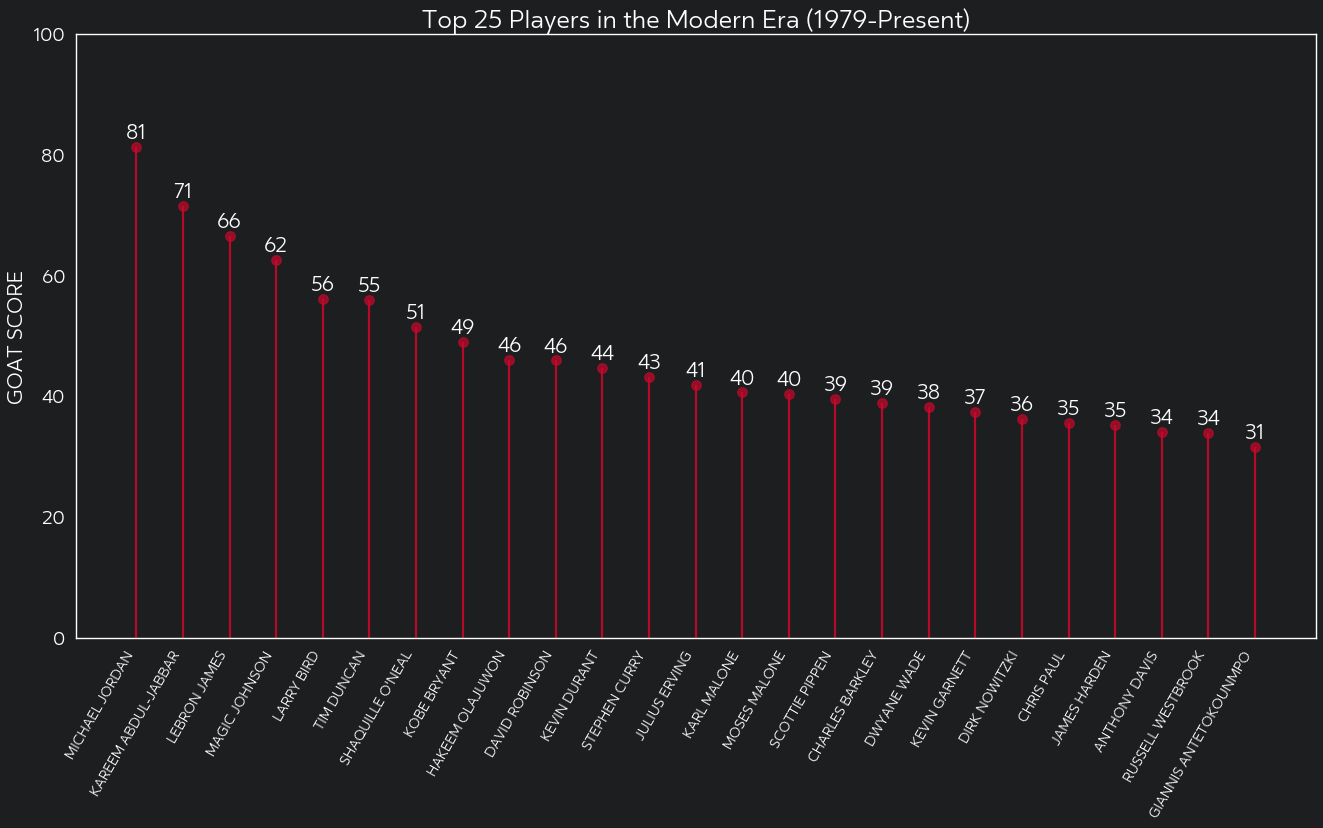

In [78]:
# Draw plot for modern players
ordered_df = df_goat_modern.sort_values(by=['GOAT_SCORE'], ascending=False)[['Player', 'GOAT_SCORE']][:25]
fig, ax = plt.subplots(figsize=(20,10), dpi= 80)
ax.vlines(x=ordered_df.index, ymin=0, ymax=ordered_df.GOAT_SCORE, color='#C9082A', alpha=0.9, linewidth=2)
ax.scatter(x=ordered_df.index, y=ordered_df.GOAT_SCORE, s=75, color='#C9082A', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Top 25 Players in the Modern Era (1979-Present)', fontdict={'size':22})
ax.set_ylabel('GOAT SCORE')
ax.set_xticks(ordered_df.index)
ax.set_xticklabels(ordered_df.Player.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 100)

# Annotate
for row in ordered_df.itertuples():
    ax.text(row.Index, row.GOAT_SCORE+.5, s=int(row.GOAT_SCORE), horizontalalignment= 'center', verticalalignment='bottom', fontsize=18)

plt.show()

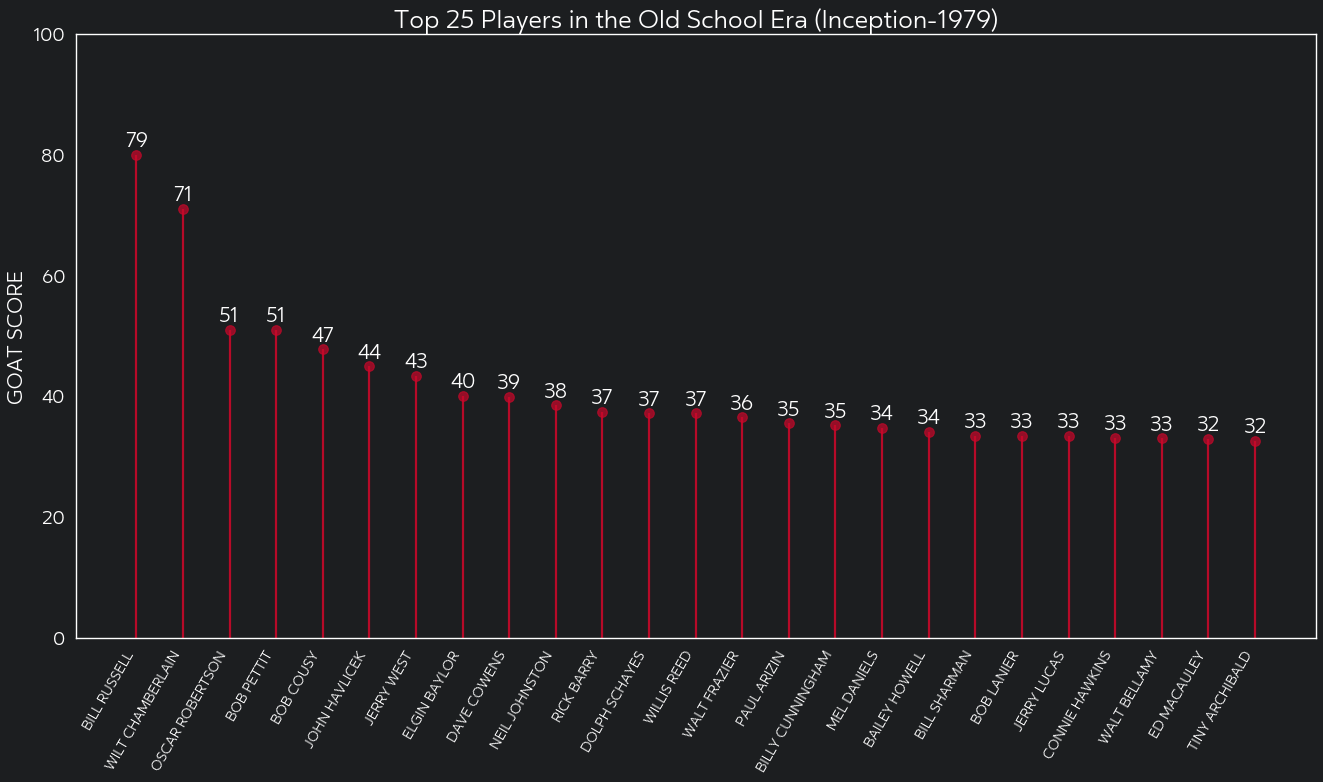

In [79]:
# Draw plot for old school players
ordered_df = df_goat_os.sort_values(by=['GOAT_SCORE'], ascending=False)[['Player', 'GOAT_SCORE']][:25]
fig, ax = plt.subplots(figsize=(20,10), dpi= 80)
ax.vlines(x=ordered_df.index, ymin=0, ymax=ordered_df.GOAT_SCORE, color='#C9082A', alpha=0.9, linewidth=2)
ax.scatter(x=ordered_df.index, y=ordered_df.GOAT_SCORE, s=75, color='#C9082A', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Top 25 Players in the Old School Era (Inception-1979)', fontdict={'size':22})
ax.set_ylabel('GOAT SCORE')
ax.set_xticks(ordered_df.index)
ax.set_xticklabels(ordered_df.Player.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 100)

# Annotate
for row in ordered_df.itertuples():
    ax.text(row.Index, row.GOAT_SCORE+.5, s=int(row.GOAT_SCORE), horizontalalignment= 'center', verticalalignment='bottom', fontsize=18)

plt.show()

### Although the old school and modern lists have different rating forumlas it is necessary to combine the two to compare to qualitative lists

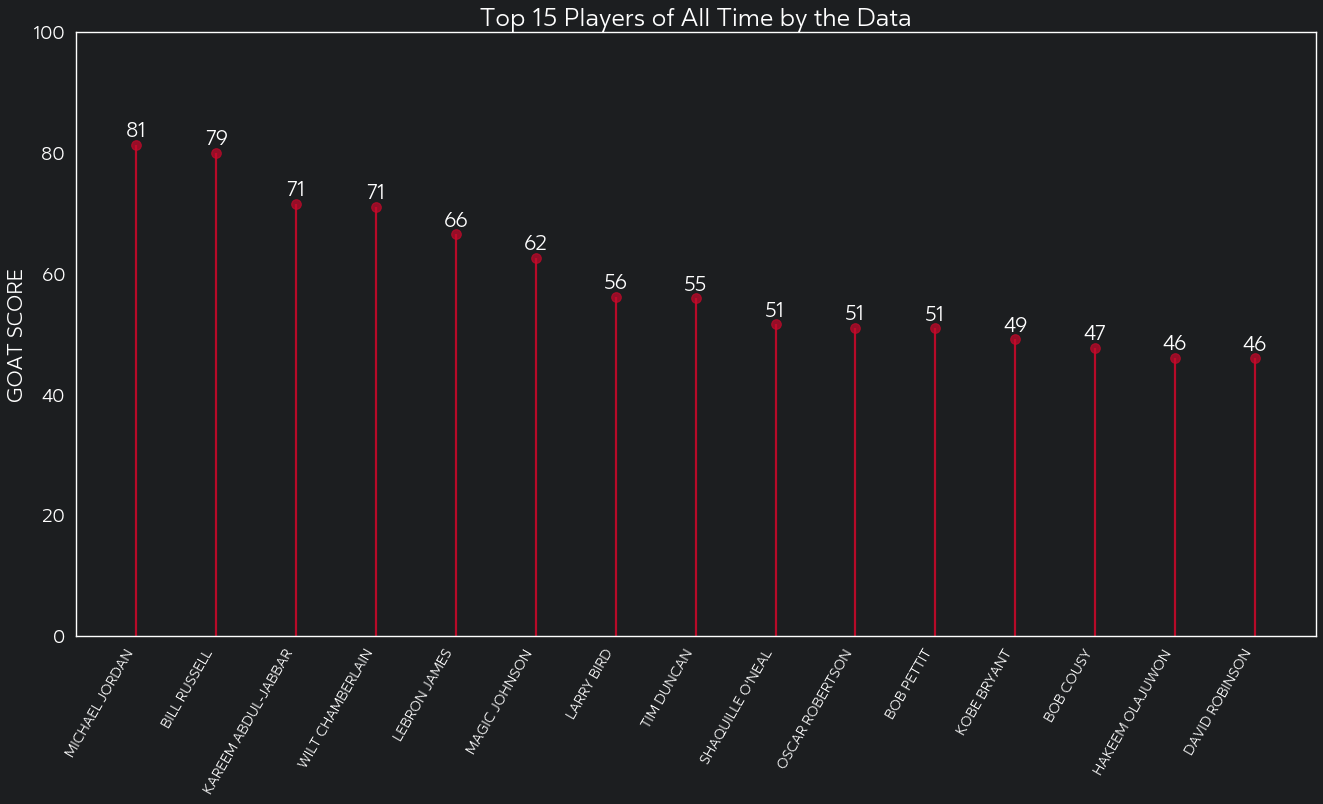

In [82]:
#Combine old school and modern data sets
df_goat_comb = pd.concat([df_goat_modern, df_goat_os])
df_goat_comb = df_goat_comb.sort_values(by=['GOAT_SCORE'], ascending = False)
df_goat_comb = df_goat_comb.reset_index(drop=True)
df_goat_comb.to_csv('df_goat_comb.csv')

# Draw plot for combined data set
ordered_df = df_goat_comb.sort_values(by=['GOAT_SCORE'], ascending=False)[['Player', 'GOAT_SCORE']][:15]
fig, ax = plt.subplots(figsize=(20,10), dpi= 80)
ax.vlines(x=ordered_df.index, ymin=0, ymax=ordered_df.GOAT_SCORE, color='#C9082A', alpha=0.9, linewidth=2)
ax.scatter(x=ordered_df.index, y=ordered_df.GOAT_SCORE, s=75, color='#C9082A', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Top 15 Players of All Time by the Data', fontdict={'size':22})
ax.set_ylabel('GOAT SCORE')
ax.set_xticks(ordered_df.index)
ax.set_xticklabels(ordered_df.Player.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 100)

# Annotate
for row in ordered_df.itertuples():
    ax.text(row.Index, row.GOAT_SCORE+.5, s=int(row.GOAT_SCORE), horizontalalignment= 'center', verticalalignment='bottom', fontsize=18)

plt.show()